In [1]:
from selenium import webdriver
import pandas as pd
from io import StringIO
from bs4 import BeautifulSoup
import re
import time
from datetime import date, datetime, timedelta
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
from scipy.linalg import cholesky
from scipy import stats
import random
import pulp
from pulp import *
import statsmodels.api as sm

## Pull in all of our data

In [117]:
file = open("../resources/latest_results.pkl",'rb')
historical_data = pkl.load(file)

In [118]:
historical_data['2020-09-13']['ACTUAL_POINTS'].head()

,Player,Pos,Avg,Fpts,NFL $5M Fantasy Football Millionaire [$1M to 1st],"NFL $300K Slant [$30K to 1st, 2x Min Cash]",NFL $500K Bootleg [$100K to 1st],NFL $2.5M Fantasy Football Millionaire [$1M to 1st],NFL $1M Luxury Box [$200K to 1st],NFL MASSIVE $25 Double Up
0,Boston Scott,RB/FLEX,51.01%,7.4,24.96% (-26.05),46.75% (-4.26),47.18% (-3.83),42.94% (-8.07),64.41% (13.40),79.82% (28.81)
1,Josh Jacobs,RB/FLEX,33.07%,35.9,25.44% (-7.63),27.52% (-5.55),29.36% (-3.71),28.02% (-5.05),35.00% (1.93),53.07% (20.00)
2,Davante Adams,WR/FLEX,32.57%,44.6,18.97% (-13.60),27.00% (-5.57),26.36% (-6.21),25.48% (-7.09),33.24% (0.67),64.39% (31.82)
3,Marvin Jones,WR/FLEX,25.78%,9.5,13.94% (-11.84),24.18% (-1.60),23.07% (-2.71),20.21% (-5.57),28.53% (2.75),44.78% (19.00)
4,Terry McLaurin,WR/FLEX,21.91%,11.1,15.69% (-6.22),20.17% (-1.74),18.95% (-2.96),19.00% (-2.91),22.94% (1.03),34.69% (12.78)


In [217]:
historical_data['2020-09-13']['ACTUAL_POINTS'][['Player', 'Fpts']].set_index('Player').to_dict()

{'Fpts': {'Lynn Bowden Jr.': 0.0}}

In [218]:
historical_data['2020-09-13']['ACTUAL_POINTS'][['Player', 'Fpts']]

,Player,Fpts
0,Lynn Bowden Jr.,7.4
1,Lynn Bowden Jr.,35.9
2,Lynn Bowden Jr.,44.6
3,Lynn Bowden Jr.,9.5
4,Lynn Bowden Jr.,11.1
...,...,...
665,Lynn Bowden Jr.,0.0
666,Lynn Bowden Jr.,0.0
667,Lynn Bowden Jr.,0.0
668,Lynn Bowden Jr.,0.0


In [119]:
historical_data['2020-09-13']['PROJECTIONS']

{'Los Angeles Chargers': {'opp': '@ CIN',
  'position': 'DST',
  'points': 8.45,
  'powner': 0.10300000000000001,
  'salary': 2000.0,
  'team': 'LAC'},
 'Tyrod Taylor': {'opp': '@ CIN',
  'position': 'QB',
  'points': 19.81,
  'powner': 0.057999999999999996,
  'salary': 5300.0,
  'team': 'LAC'},
 'Detroit Lions': {'opp': 'CHI',
  'position': 'DST',
  'points': 7.07,
  'powner': 0.047,
  'salary': 2100.0,
  'team': 'DET'},
 'Jared Goff': {'opp': 'DAL',
  'position': 'QB',
  'points': 19.5,
  'powner': 0.0,
  'salary': 5800.0,
  'team': 'LAR'},
 'Patrick Mahomes': {'opp': 'HOU',
  'position': 'QB',
  'points': 25.66,
  'powner': 0.0,
  'salary': 7700.0,
  'team': 'KCC'},
 'Irv Smith': {'opp': 'GBP',
  'position': 'TE',
  'points': 9.67,
  'powner': 0.012,
  'salary': 2900.0,
  'team': 'MIN'},
 'Jimmy Garoppolo': {'opp': 'ARI',
  'position': 'QB',
  'points': 18.78,
  'powner': 0.049,
  'salary': 5700.0,
  'team': 'SFO'},
 'Deshaun Watson': {'opp': '@ KCC',
  'position': 'QB',
  'points':

In [120]:
PROJECTIONS = historical_data['2020-09-13']['PROJECTIONS']

In [121]:
historical_data['2020-09-13']['CONTESTS'][0]

{'Name': 'NFL $5M Fantasy Football Millionaire [$1M to 1st]',
 'Link': 'Contest',
 'Prize Pool': '$5,025,000',
 'Buy In': '$5',
 'Top Prize': '$1,000,000',
 'Max Entries': 150,
 'Entries': 1195006,
 'Cash Line': nan,
 'Winner': nan,
 'Winning Score': nan,
 'PAYOUTS':     Rank                 User  Points  Entries       Prize
 0      1          chumleigh54  255.86       32  $4,572,275
 1      2             tossboss  254.36      150    $200,000
 2      3            tadavisii  252.66       18    $100,000
 3      4            kincaidt1  250.76        5     $50,000
 4      5        Aceboogie33rd  250.40        1     $30,000
 ..   ...                  ...     ...      ...         ...
 45  9995        Marmv9 Member  196.96       91      $21.11
 46  9995             tisoyh76  196.96        6      $21.11
 47  9995       h3budda Member  196.96      150      $21.11
 48  9995  mtamburri922 Member  196.96      150      $21.11
 49  9995         jasgieselman  196.96      150      $21.11
 
 [10050 row

In [175]:
historical_data['2020-09-13']['CONTESTS'][1]['PAYOUTS'].tail()

,Rank,User,Points,Entries,Prize
45,9960,hishboo Member,178.90,150,$10
46,9960,ziploc19,178.90,3,$10
47,9960,Gambler5555 Member,178.90,37,$10
48,9960,Nitram99 Member,178.90,20,$10
49,10000,brianhaywood99,178.88,8,$10


In [123]:
detailed_projections = pd.read_csv("../resources/projections_draftkings_nfl_2020-1.csv")

In [124]:
#we'll be using this data-set when plugging into linear optimization
detailed_projections.head(10)

,player_id,team,opp,pos,name,fpts,proj_own,ceil,floor,min_exposure,max_exposure
0,1849841,SEA,ATL,TE,Tyler Mabry,0.00,NaN,NaN,NaN,0,100
1,1844405,NEP,MIA,K,Justin Rohrwasser,0.00,NaN,NaN,NaN,0,100
2,1849791,LAR,DAL,RB,Xavier Jones,0.00,NaN,NaN,NaN,0,100
3,328578,NYJ,BUF,QB,Mike White,0.00,NaN,NaN,NaN,0,100
4,871255,IND,JAC,WR,Malik Henry,0.00,NaN,NaN,NaN,0,100
5,1844490,IND,JAC,TE,Farrod Green,0.00,NaN,NaN,NaN,0,100
6,982789,ARI,SFO,WR,Andy Isabella,3.25,0.1,6.47,0.29,0,100
7,875523,TEN,DEN,WR,Kristian Wilkerson,0.00,NaN,NaN,NaN,0,100
8,689689,CLE,BAL,TE,Pharaoh Brown,0.00,NaN,NaN,NaN,0,100
9,36967,NYG,PIT,RB,Wayne Gallman Jr.,0.53,NaN,1.06,0.01,0,100


### cleaning up some data

In [158]:
detailed_projections = detailed_projections[~detailed_projections.team.isin(['TEN', 'DEN', 'KCC','HOU'])]
detailed_projections = detailed_projections.fillna(0)
detailed_projections

,player_id,team,opp,pos,name,fpts,proj_own,ceil,floor,min_exposure,max_exposure
0,1849841,SEA,ATL,TE,Tyler Mabry,0.00,0.0,0.00,0.0,0,100
1,1844405,NEP,MIA,K,Justin Rohrwasser,0.00,0.0,0.00,0.0,0,100
2,1849791,LAR,DAL,RB,Xavier Jones,0.00,0.0,0.00,0.0,0,100
3,328578,NYJ,BUF,QB,Mike White,0.00,0.0,0.00,0.0,0,100
4,871255,IND,JAC,WR,Malik Henry,0.00,0.0,0.00,0.0,0,100
...,...,...,...,...,...,...,...,...,...,...,...
943,11654,DET,CHI,QB,Chase Daniel,0.00,0.0,0.00,0.0,0,100
944,36834,CIN,LAC,TE,Mason Schreck,0.00,0.0,0.00,0.0,0,100
945,981968,BAL,CLE,WR,Miles Boykin,7.11,0.6,13.15,0.5,0,100
946,553024,SEA,ATL,TE,Tyler Ott,0.00,0.0,0.00,0.0,0,100


In [126]:
PROJECTIONS = {a:PROJECTIONS[a]for a in PROJECTIONS if PROJECTIONS[a]['team'] not in ['TEN', 'DEN', 'KCC','HOU']}

In [127]:
len(set(historical_data['2020-09-13']['ACTUAL_POINTS'].Player))

670

In [128]:
len(set(detailed_projections.name))

831

In [129]:
len(set(detailed_projections.name).intersection(set(historical_data['2020-09-13']['ACTUAL_POINTS'].Player)))

654

In [130]:
juniors = set(historical_data['2020-09-13']['ACTUAL_POINTS'].Player)-set(detailed_projections.name)

In [131]:
#cleaning up some crap

In [132]:
players = historical_data['2020-09-13']['ACTUAL_POINTS'].Player
for i in range(len(players)):
    if players[i] in juniors:
        players[i] = players[i] + " Jr."
historical_data['2020-09-13']['ACTUAL_POINTS'].Player = players

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [133]:
teams_translate = {
    "Arizona Cardinals": 'ARI',
    "Atlanta Falcons": "ATL",
    'Baltimore Ravens': "BAL",
    'Buffalo Bills': 'BUF',
    'Carolina Panthers': 'CAR',
    'Chicago Bears': 'CHI',
    'Cincinnati Bengals': 'CIN',
    'Cleveland Browns': 'CLE',
    'Dallas Cowboys': 'DAL',
    'Denver Broncos': 'DEN',
    'Detroit Lions': 'DET',
    'Green Bay Packers': 'GBP',
    'Houston Texans': 'HOU',
    'Indianapolis Colts': 'IND',
    'Jacksonville Jaguars': 'JAC',
    'Kansas City Chiefs': 'KCC',
    'Las Vegas Raiders': 'LVR',
    'Los Angeles Chargers': 'LAC',
    'Los Angeles Rams': 'LAR',
    'Miami Dolphins': 'MIA',
    'Minnesota Vikings': 'MIN',
    'New England Patriots': 'NEP',
    'New Orleans Saints': 'NOS',
    'New York Giants': 'NYG',
    'New York Jets': 'NYG',
    'Philadelphia Eagles': 'PHI',
    'Pittsburgh Steelers': 'PIT',
    'San Francisco 49ers': 'SFO',
    'Seattle Seahawks': 'SEA',
    'Tampa Bay Buccaneers': 'TBB',
    'Tennessee Titans' : 'TEN',
    'Washington Football Team': 'WAS'
}

In [134]:
teams_translate = {
    "Arizona Cardinals": 'Cardinals',
    "Atlanta Falcons": "Falcons",
    'Baltimore Ravens': "Ravens",
    'Buffalo Bills': 'Bills',
    'Carolina Panthers': 'Panthers',
    'Chicago Bears': 'Bears',
    'Cincinnati Bengals': 'Bengals',
    'Cleveland Browns': 'Browns',
    'Dallas Cowboys': 'Cowboys',
    'Denver Broncos': 'Broncos',
    'Detroit Lions': 'Lions',
    'Green Bay Packers': 'Packers',
    'Houston Texans': 'Texans',
    'Indianapolis Colts': 'Colts',
    'Jacksonville Jaguars': 'Jaguars',
    'Kansas City Chiefs': 'Chiefs',
    'Las Vegas Raiders': 'Raiders',
    'Los Angeles Chargers': 'Chargers',
    'Los Angeles Rams': 'Rams',
    'Miami Dolphins': 'Dolphins',
    'Minnesota Vikings': 'Vikings',
    'New England Patriots': 'Patriots',
    'New Orleans Saints': 'Saints',
    'New York Giants': 'Giants',
    'New York Jets': 'Jets',
    'Philadelphia Eagles': 'Eagles',
    'Pittsburgh Steelers': 'Steelers',
    'San Francisco 49ers': '49ers',
    'Seattle Seahawks': 'Seahawks',
    'Tampa Bay Buccaneers': 'Buccaneers',
    'Tennessee Titans' : 'Titans',
    'Washington Football Team': 'WAS Football Team'
}

In [142]:
left_over_crap = {
    'Allen Robinson': 'Allen Robinson II',
    'Bennie Fowler': 'Bennie Fowler III',
    'Benny Snell': 'Benny Snell Jr.',
    'D.J. Moore': 'DJ Moore',
    'D.K. Metcalf':'DK Metcalf',
    'Darrell Henderson': 'Darrell Henderson Jr.',
    'Gardner Minshew': 'Gardner Minshew II',
    'John Ross': 'John Ross III',
    'Khadarel Hodge': 'KhaDarel Hodge',
    'Mark Ingram': 'Mark Ingram II',
    'Ray-Ray McCloud': 'Ray-Ray McCloud III',
    'Ronald Jones': 'Ronald Jones II',
    'Todd Gurley': 'Todd Gurley II',
    'Van Jefferson': 'Van Jefferson Jr.',
    'Wayne Gallman': 'Wayne Gallman Jr.',
    'Willie Snead': 'Willie Snead IV'
}

In [143]:
players = list(PROJECTIONS.keys())
for i in range(len(players)):
    if players[i] in juniors:
        PROJECTIONS[players[i] + " Jr."] = PROJECTIONS[players[i]]
        del PROJECTIONS[players[i]]
    if players[i] in teams_translate:
        PROJECTIONS[teams_translate[players[i]]] = PROJECTIONS[players[i]]
        del PROJECTIONS[players[i]]
    if players[i] in left_over_crap:
        PROJECTIONS[left_over_crap[players[i]]] = PROJECTIONS[players[i]]
        del PROJECTIONS[players[i]]
    
historical_data['2020-09-13']['ACTUAL_POINTS'].Player = players[i]

In [144]:
len(teams_translate)

32

In [145]:
len(set(detailed_projections.name).intersection(set(historical_data['2020-09-13']['ACTUAL_POINTS'].Player)))

1

In [147]:
set(historical_data['2020-09-13']['ACTUAL_POINTS'].Player)-set(detailed_projections.name)
#this guy is irrelevant

set()

In [148]:
set(PROJECTIONS.keys())-set(detailed_projections.name)

set()

(array([461.,   4.,   0.,   0.,   3.,   6.,   4.,   0.,   0.,   1.]),
 array([ 0.   ,  1.399,  2.798,  4.197,  5.596,  6.995,  8.394,  9.793,
        11.192, 12.591, 13.99 ]),
 <a list of 10 Patch objects>)

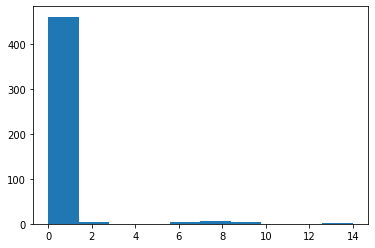

In [155]:
#those who aren't projected are a bunch of nobodies
x = detailed_projections[detailed_projections.name.isin(set(detailed_projections.name)-set(PROJECTIONS.keys()))]
plt.hist(x.fpts)

# Linear Optimization Time

In [17]:
# some important helper functions

def add_position_requirement(prob,example_results, example_projections, choices, pos, number):
    players = list(example_projections.keys())
    POS = list(example_results[example_results.apply(lambda x: pos in x['Pos'].split('/'), axis=1)].Player)
    POS = [re.sub(r'([^\s\w]|_)+', '', a) for a in POS]
    POS = [name.split()[0]+ " " + name.split()[1] for name in POS]
    prob += lpSum([choices[v] for v in POS if v in players]) >= number

def add_all_position_requirements(prob, results, projections, choices):
    add_position_requirement(prob, results, projections,choices, 'QB',1)
    add_position_requirement(prob, results, projections,choices,  'PG', 1)
    add_position_requirement(prob, results, projections,choices, 'SG', 1)
    add_position_requirement(prob, results, projections,choices, 'PF', 1)
    add_position_requirement(prob, results, projections,choices, 'SF', 1)
    add_position_requirement(prob, results, projections,choices, 'F', 2)
    add_position_requirement(prob, results, projections,choices, 'G', 2)
    
def get_Fpts(df, player):
    df = df[df['Player'] == player]
    #print(df)
    #print(player)
    try:
        return 0 if np.isnan(df.iloc[0].Fpts) else df.iloc[0].Fpts
    except:
        #print("??? {}".format(player))
        return 0
def get_payout(df, points):
    df = df[df['Points'] < points]
    if df.empty:
        return 0
    try:
        return float(df.iloc[0].Prize[1:].replace(",",""))
    except:
        return 0

In [18]:
# uses linear algebra to return a random lineup that satisfies certain constraints
def get_max_ev(results, projections):
    players = set(projections.keys()).intersection(results.Player)
    
    # Instantiate our problem class
    prob = pulp.LpProblem("NBA Maximizing EV", pulp.LpMaximize)
    choices = LpVariable.dicts("Choice", players, cat='Binary')
    
    # 8 people to a team
    prob += lpSum([choices[v] for v in players]) == 8
    
    #add all the necessary position constraints
    add_all_position_requirements(prob, results, projections, choices)
    #adding in the salary constraint
    prob += pulp.lpDot([choices[v] for v in players],[projections[name]['salary'] for name in players]) <= 50001

    #optimizing function
    prob += pulp.lpDot([choices[v] for v in players],[projections[name]['points']-np.mean(player_data[name]["mean"]) for name in players]), "Total Projection"
    prob.solve()
    return(value(prob.objective))

In [168]:
def lineup(choices, players):
    return [player for player in players if (choices[player].varValue == 1)]

In [214]:
def add_position_constraint(prob, projections, position, constraint):
    sub_players = [player for player in projections if projections[player]['position'] == position]
    #print(sub_players)
    prob += lpSum([choices[v] for v in sub_players]) >= constraint

In [212]:
def add_flex_constraint(prob, projections):
    sub_players = [player for player in projections if projections[player]['position'] in ['RB', 'WR', 'TE']]
    prob += lpSum([choices[v] for v in sub_players]) == 7

In [215]:
players = list(PROJECTIONS.keys())
prob = pulp.LpProblem("NFL Maximizing EV", pulp.LpMaximize)
choices = LpVariable.dicts("Choice", players, cat='Binary')
# 8 people to a team
prob += lpSum([choices[v] for v in players]) == 9
#adding in the salary constraint
prob += pulp.lpDot([choices[v] for v in players],[PROJECTIONS[name]['salary'] for name in players]) <= 50001


#adding in position constraints
add_position_constraint(prob, PROJECTIONS, 'QB', 1)
add_position_constraint(prob, PROJECTIONS, 'RB', 2)
add_position_constraint(prob, PROJECTIONS, 'WR', 3)
add_position_constraint(prob, PROJECTIONS, 'TE', 1)
add_position_constraint(prob, PROJECTIONS, 'DST', 1)
add_flex_constraint(prob, PROJECTIONS)



#objective function
#optimizing function
prob += pulp.lpDot([choices[v] for v in players],
                       [PROJECTIONS[name]['points'] for name in players]), "Total Projection"
prob.solve()
print("expected ev is", value(prob.objective))
print(lineup(choices, players))
print("total cost is", value(pulp.lpDot([choices[v] for v in players],[PROJECTIONS[name]['salary'] for name in players])))

expected ev is 152.68
['Tyrod Taylor', 'Boston Scott', 'Michael Thomas', 'Davante Adams', 'George Kittle', 'Joe Mixon', 'Chargers', 'Irv Smith Jr.', 'Marvin Jones Jr.']
total cost is 49800.0


In [207]:
prob.valid()

True

In [201]:
prob

NFL Maximizing EV:
MAXIMIZE
7.5*Choice_49ers + 12.78*Choice_A.J._Green + 2.77*Choice_AJ_Dillon + 15.8*Choice_Aaron_Jones + 18.13*Choice_Aaron_Rodgers + 2.31*Choice_Adam_Shaheen + 18.0*Choice_Adam_Thielen + 0.59*Choice_Adam_Trautman + 4.66*Choice_Adrian_Peterson + 0.43*Choice_Alec_Ingold + 0.04*Choice_Alex_Erickson + 6.79*Choice_Alexander_Mattison + 11.63*Choice_Allen_Lazard + 16.11*Choice_Allen_Robinson_II + 19.2*Choice_Alvin_Kamara + 16.37*Choice_Amari_Cooper + 3.61*Choice_Andy_Isabella + 11.22*Choice_Anthony_Miller + 2.3*Choice_Antonio_Gandy_Golden + 11.04*Choice_Antonio_Gibson + 6.25*Choice_Auden_Tate + 17.83*Choice_Austin_Ekeler + 9.15*Choice_Austin_Hooper + 16.27*Choice_Baker_Mayfield + 6.77*Choice_Bears + 18.72*Choice_Ben_Roethlisberger + 5.77*Choice_Bengals + 0.12*Choice_Bennie_Fowler_III + 6.25*Choice_Benny_Snell_Jr. + 8.64*Choice_Bills + 1.42*Choice_Blake_Bell + 8.81*Choice_Blake_Jarwin + 15.48*Choice_Boston_Scott + 0.09*Choice_Brandon_Zylstra + 1.75*Choice_Braxton_Berrios + 7

In [198]:
[choices[key].value() for key in choices]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.057428571,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [185]:
[PROJECTIONS[name]['salary'] for name in lineup(choices, players)]

[5300.0, 5800.0, 5700.0, 6500.0, 6600.0, 6800.0, 8200.0, 2000.0]

In [176]:
PROJECTIONS

{'Tyrod Taylor': {'opp': '@ CIN',
  'position': 'QB',
  'points': 19.81,
  'powner': 0.057999999999999996,
  'salary': 5300.0,
  'team': 'LAC'},
 'Jared Goff': {'opp': 'DAL',
  'position': 'QB',
  'points': 19.5,
  'powner': 0.0,
  'salary': 5800.0,
  'team': 'LAR'},
 'Jimmy Garoppolo': {'opp': 'ARI',
  'position': 'QB',
  'points': 18.78,
  'powner': 0.049,
  'salary': 5700.0,
  'team': 'SFO'},
 'Russell Wilson': {'opp': '@ ATL',
  'position': 'QB',
  'points': 21.2,
  'powner': 0.083,
  'salary': 6500.0,
  'team': 'SEA'},
 'Matt Ryan': {'opp': 'SEA',
  'position': 'QB',
  'points': 21.27,
  'powner': 0.076,
  'salary': 6600.0,
  'team': 'ATL'},
 'Dak Prescott': {'opp': '@ LAR',
  'position': 'QB',
  'points': 21.76,
  'powner': 0.0,
  'salary': 6800.0,
  'team': 'DAL'},
 'Cam Newton': {'opp': 'MIA',
  'position': 'QB',
  'points': 20.46,
  'powner': 0.055,
  'salary': 6400.0,
  'team': 'NEP'},
 'Lamar Jackson': {'opp': 'CLE',
  'position': 'QB',
  'points': 26.22,
  'powner': 0.139,
